In [3]:
import h5py
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image


######## Very basic access to the dataset - let's see what we are working with! #######
raw_dataset = h5py.File('climatevisions_2019_popular.h5','r+') 
image_directory = 'C:\\Users\\Admin\\Documents\\Dataset_small\\'
contents = os.listdir(image_directory)
#print(contents)


# Access the 'upper' data - we only have tweet data 
for item in raw_dataset.keys():
   print("Items: " + item)    
    
# Access the actual subgroups with data for us - different info we can look at - mostly things provided in Excel by Katharina
for item in raw_dataset.require_group('tweet_data').keys():
    print(item)


Items: tweet_data
created_at
img_name
language
like_count
quote_count
referenced_tweets
retweet_count
text
tweet_id


In [4]:
# Access the dataset within the group
dataset = raw_dataset['tweet_data']  ## excludes unnecessary information - only tweet_data
 
# Create a dictionary to store column data
data_dict = {}
    
# Iterate through the keys (assuming each key is a column name)
for key in dataset.keys():
     # Access the data for each column
     column_data = dataset[key][:]
        
     # Store the data in the dictionary with the column name as the key
     data_dict[key] = column_data
 
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data_dict)
df.head()


,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
0,b'2019-07-22T12:38:24.000Z',b'id_1153283149360762880_2019-07-22.jpg\n',b'en',b'82582',b'3918',b'<NA>',b'50280',b'the UN released a 740 page report compiled o...,b'1153283149360762880'
1,b'2019-08-20T09:28:39.000Z',b'id_1163744643600637952_2019-08-20.jpg\n',b'en',b'69820',b'2456',b'<NA>',b'51781',"b'The Amazon Rainforest, one of the wettest pl...",b'1163744643600637952'
2,b'2019-04-28T18:51:22.000Z',b'id_1122574040936452097_2019-04-28.jpg\n',b'en',b'69235',b'87',b'<NA>',b'11051',b'just learned about climate change https://t....,b'1122574040936452097'
3,b'2019-10-28T13:10:13.000Z',b'id_1188805167958974465_2019-10-28.jpg\n',b'en',b'65465',b'70',b'<NA>',b'6124',b'Climate change caused this. https://t.co/JG2...,b'1188805167958974465'
4,b'2019-03-19T16:30:00.000Z',b'id_1108042949449969666_2019-03-19.jpg\n',b'en',b'62852',b'976',b'<NA>',b'9145',b'#GreenNewDeal haters\xe2\x80\x99 plan to add...,b'1108042949449969666'


# Preprocessing

In [5]:
# strip of "b'" of all strings

cols_to_strip = ['created_at', 'img_name', 'language', 'referenced_tweets', 'text', 'tweet_id']   

df[cols_to_strip] = df[cols_to_strip].astype('string')
df[cols_to_strip] = df[cols_to_strip].replace(to_replace=r'^b\':?(.*)\'$', value=r'\1', regex=True)


print(df.shape)
df.dtypes

## only keep images here
# drop all columns exepct img_ columns
selected_columns = ['img_name']
df_selected = df.loc[:, selected_columns]
df_selected.head()

(5000, 9)


,img_name
0,id_1153283149360762880_2019-07-22.jpg
1,id_1163744643600637952_2019-08-20.jpg
2,id_1122574040936452097_2019-04-28.jpg
3,id_1188805167958974465_2019-10-28.jpg
4,id_1108042949449969666_2019-03-19.jpg


print(df_selected['img_name'].iloc[0])

Image.open

In [4]:
df.head()

,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
0,2019-07-22T12:38:24.000Z,id_1153283149360762880_2019-07-22.jpg,en,b'82582',b'3918',<NA>,b'50280',the UN released a 740 page report compiled ove...,1153283149360762880
1,2019-08-20T09:28:39.000Z,id_1163744643600637952_2019-08-20.jpg,en,b'69820',b'2456',<NA>,b'51781',"The Amazon Rainforest, one of the wettest plac...",1163744643600637952
2,2019-04-28T18:51:22.000Z,id_1122574040936452097_2019-04-28.jpg,en,b'69235',b'87',<NA>,b'11051',just learned about climate change https://t.co...,1122574040936452097
3,2019-10-28T13:10:13.000Z,id_1188805167958974465_2019-10-28.jpg,en,b'65465',b'70',<NA>,b'6124',Climate change caused this. https://t.co/JG2Ly...,1188805167958974465
4,2019-03-19T16:30:00.000Z,id_1108042949449969666_2019-03-19.jpg,en,b'62852',b'976',<NA>,b'9145',#GreenNewDeal haters’ plan to address Climate ...,1108042949449969666


In [5]:
df.describe()

,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
count,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,4999,5000,28,1237,232,1,735,5000,5000
top,2019-02-07T19:34:34.000Z,id_1153283149360762880_2019-07-22.jpg\n,en,b'161',b'2',<NA>,b'50',the UN released a 740 page report compiled ove...,1153283149360762880
freq,2,1,4823,39,363,5000,51,1,1


## Missing Values

#### Observations:
- entities_cashtags, in_reply_to_user_id, referenced_tweets only missing values
- 100-400 missing values: geo_coord_data, geo_coord_type, withheld_copyright, withheld_countrycode
- around 300.000 missing: entities_annotations, entities_mentions

In [6]:
# replace string NA to "real" missing value for further analysis
df = df.replace(r'^NA$', np.nan, regex=True)
df.isna().sum()

created_at           0
img_name             0
language             0
like_count           0
quote_count          0
referenced_tweets    0
retweet_count        0
text                 0
tweet_id             0
dtype: int64

## Analysis of 5000 most popular images (trying to understand patterns by looking at them by hand)
- some popular figures such as Trump, Greta Thunberg are visible
- a lot of text is presented in form of statistics, pictures of other tweets, text of e.g. political announcements
  => Reading out text from images might end up being very important
- A lot of emotions displayed (destroyed wall, happy or sad people on images)
- Animals exist often in image (e.g. polar bears)


## Testing of Models 

### Goals:
- try to find fitting models for our project
- produce good results for analysis, try to visualize it to later display in GUI

In [7]:
from torchvision.io import read_image
from torchvision.models import convnext_large, ConvNeXt_Large_Weights


## Image Classification - supposed to display most important object - example Test - ConvNext (doesn't really work well)
img = read_image(image_directory + 'id_1092304223591587840_2019-02-04.jpg')

weights_convNext = ConvNeXt_Large_Weights.DEFAULT
model_convNext = convnext_large(weights=weights_convNext)
model_convNext.eval()
preprocess_convNext = weights_convNext.transforms()
batch_convNext = preprocess_convNext(img).unsqueeze(0)
prediction_convNext = model_convNext(batch_convNext).squeeze(0).softmax(0)
class_id_convNext = prediction_convNext.argmax().item()
score = prediction_convNext[class_id_convNext].item()
category_name = weights_convNext.meta["categories"][class_id_convNext]
print(f"{category_name}: {100 * score:.1f}%")




c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Windsor tie: 44.1%


In [8]:
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image

## Test Model for semantic segmentation - has a few different weights and can e.g. create a mask of a human being but... surely there are better models
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

img = read_image(image_directory + 'id_1092304223591587840_2019-02-04.jpg')

preprocess = weights.transforms()

batch = preprocess(img).unsqueeze(0)

prediction = model(batch)["out"]
normalized_masks = prediction.softmax(dim=1)
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
mask = normalized_masks[0, class_to_idx["person"]]

print(weights.meta["categories"])
to_pil_image(mask).show()


['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [20]:
####### describes the image as text - works quite well on several different images we tried so far
### partially detects celebreties (for example donald trump) - does not detect greta thunberg but always refers to her as 'girl with braids', does read text from images (OCR), provides a short description of what the image entails
### can be used for sentiment analysis
from transformers import pipeline
imgToText = pipeline("image-to-text", model="aisak-ai/aisak-visual")
img = image_directory + 'id_1117736292798824448_2019-04-15.jpg'
result = imgToText(img)

print(result)

[{'generated_text': 'arafed crowd of people gathered in a park with a speaker'}]


YOLOv5  2024-4-11 Python-3.12.2 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5n summary: 270 layers, 1872157 parameters, 0 gradients, 4.6 GFLOPs
Adding AutoShape... 


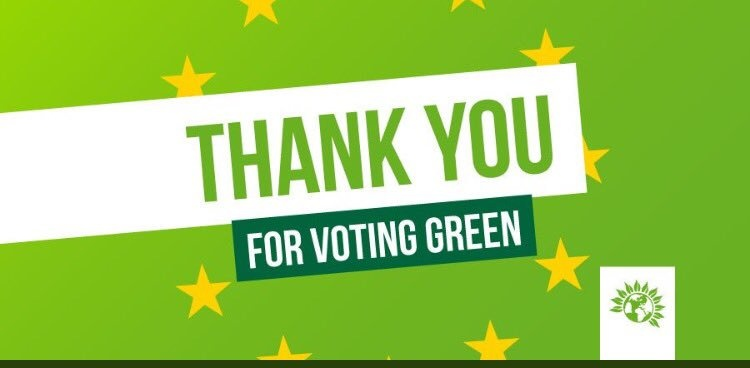

Saved 1 image to results3


tensor([])


In [6]:
### Predicts objects in the model
## if this predicts no bounding boxes this might mean that no objects are present -> in this case it could make sense to throw such an image into an OCR model in all cases
## sometimes has good predictions especially with humans - tends to be quite accurate with clothes too but objects in the sea are hard to detect

import yolov5

# load model
model = yolov5.load('fcakyon/yolov5n-v7.0')
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = image_directory + 'id_1132809620601409536_2019-05-27.jpg'

# perform inference
results = model(img)

# inference with larger input size
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')

print(categories)



In [15]:
### Model that describes scenes very well and gives it some semantic meaning like describing a protest as a protest
## long run-time in comparison to the

from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
 
model_id = "vikhyatk/moondream2"
revision = "2024-04-02"
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
 
image = Image.open(image_directory + 'id_1131656880894423041_2019-05-23.jpg')
enc_image = model.encode_image(image)
print(model.answer_question(enc_image, "Describe this image.", tokenizer))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image depicts three cartoon girls with distinct hairstyles and colorful outfits, each holding a balloon. The girl on the left has blonde hair and is wearing a blue dress, the girl in the middle has red hair and is wearing a pink dress, and the girl on the right has black hair and is wearing a green dress. The girls are standing on a pink and green striped platform, with a blue and green striped platform in the background.


In [12]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import pipeline

from PIL import Image
from ultralytics import YOLO
import cv2





image_data = df["img_name"].tolist()

i = 0
count = 0
for img_name in image_data: 
    # Load a model
    model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
    animals = ['bear', 'penguin', 'polar bear'] 
   
    img_name = img_name.replace("\n","")
 
    image = Image.open(image_directory + img_name)
    image.show()
   
    results = model(image)  # predict on an image or image directory
    names = model.names
    #bounding boxes and confidence scores
 
    for result in results:
        detected_objects = []
        detections = result.pred[0] if hasattr(result, 'pred') else None  # Get the detections if available
        result.save()
        result.show()
        # Display the detected objects
        ids = result.boxes.cls
        for id in ids:
            name = names[int(id)]
            if (name not in detected_objects):
                detected_objects.append(name)
        print(detected_objects)
        
        if ('person' in detected_objects):
            #TODO FACE RECOGNITION
            print('person')
        elif (any(animal in detected_objects for animal in animals)):
            #TODO
            print('animals')
        else:
            #TODO
            print('else')
            print()
            
            
    
    # long description model
    model_id = "vikhyatk/moondream2"
    revision = "2024-04-02"
    model = AutoModelForCausalLM.from_pretrained(
        model_id, trust_remote_code=True, revision=revision
    )
    tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
 
    enc_image = model.encode_image(image)
    moonDreamResult = model.answer_question(enc_image, "Describe this image.", tokenizer)
    print(moonDreamResult)
    
    # short description model
    imgToText = pipeline("image-to-text", model="aisak-ai/aisak-visual")
    resultShortDescription = imgToText(image)
    print(resultShortDescription)    
    ## compare those two models #TODO
    
    
    # Depth Anything for Depth Estimation - Foreground/Background
    #pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-large-hf")
    #depth = pipe(image)["depth"]
    #cv2.imshow('Depth Anything', depth)
    
    i+=1
    if (i == 4):
        break

    
    # image_name, object_detection_results, description_long, description_short, description_comparison, 
    num_entries = 4
    with h5py.File('climatevisions_2019_popular_results.h5', 'w') as hf:
        tweet_data_group = hf.create_group('tweet_data')
        
        image_name_dataset = tweet_data_group.create_dataset('image_name', shape=(5000,), dtype=h5py.string_dtype())
        object_detection_results_dataset = tweet_data_group.create_dataset('object_detection_results', shape=(5000,), dtype=h5py.string_dtype())
        description_long_dataset = tweet_data_group.create_dataset('description_long', shape=(5000,), dtype=h5py.string_dtype())
        description_short_dataset = tweet_data_group.create_dataset('description_short', shape=(5000,), dtype=h5py.string_dtype())
        description_comparison_dataset = tweet_data_group.create_dataset('description_comparison', shape=(5000,), dtype=h5py.string_dtype())
        
        object_string = ''
        for index, object in enumerate(detected_objects):
            if (index < len(detected_objects)):
                object_string += object + ',' + ' '
            else:
                object_string += object
        
        hf["tweet_data/image_name"][count] = img_name
        hf["tweet_data/object_detection_results"][count] = object_string
        hf['tweet_data/description_long'][count] = moonDreamResult
        
        mapEntry = resultShortDescription[0]
        firstValueShort = next(iter(mapEntry.values()))
    
        print(firstValueShort)
        hf['tweet_data/description_short'][count] = firstValueShort
        hf['tweet_data/description_comparison'][count] = ''
        
        
    count += 1
    detected_objects.clear

        




0: 640x384 (no detections), 393.8ms
Speed: 2.0ms preprocess, 393.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
[]
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image shows a screenshot of a webpage from the United Nations' website. The webpage is titled "Welcome to the United Nations" and is displayed in English. The text on the webpage is in English, providing information about the United Nations' role in addressing climate change. The webpage is in a mobile format, suggesting it is accessible on a smartphone or tablet. The image does not contain any visible text or graphics.
[{'generated_text': 'a screenshot of a cell phone with a message about the weather'}]
a screenshot of a cell phone with a message about the weather

0: 416x640 (no detections), 418.1ms
Speed: 1.0ms preprocess, 418.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
[]
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image depicts a serene winter landscape with a frozen lake in the foreground. The lake is covered in a layer of snow, reflecting the clear blue sky above. On the left side of the lake, a line of bare-branched trees stands tall, their branches reaching out into the sky. The trees are covered in a layer of snow, adding to the wintry atmosphere. The sky above is a clear blue, with a few clouds scattered across it. The image is taken from a low angle, emphasizing the height of the trees and the vastness of the sky.
[{'generated_text': 'arafed view of a field with a trail in the snow'}]
arafed view of a field with a trail in the snow

0: 480x640 1 bird, 422.0ms
Speed: 3.3ms preprocess, 422.0ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)
['bird']
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image shows a hole in a white wall, with a small piece of white paper peeking out from the hole. The hole is located in the center of the image, and the paper is slightly tilted to the right. The background is a plain white wall, and a door is visible on the right side of the image.
[{'generated_text': 'a close up of a hole in a wall with a black and white dog'}]
a close up of a hole in a wall with a black and white dog

0: 640x608 1 person, 388.5ms
Speed: 3.0ms preprocess, 388.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 608)
['person']
person


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In the image, a person dressed in a vibrant red suit and yellow jacket is captured in a moment of joy, their arms raised high in the air. The person is standing on a set of stairs, which are covered in a layer of snow, creating a stark contrast against the dark background. The stairs lead the viewer's eye upwards, adding a sense of depth to the scene. The person's position on the stairs and the snow-covered stairs suggest they are at the top of the stairs, possibly celebrating a victory or achievement.
[{'generated_text': 'there is a man in a red suit falling down a snow covered ramp'}]


In [13]:
## Write into .csv file

from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import pipeline

from PIL import Image
from ultralytics import YOLO
import cv2
from openpyxl import Workbook

wb = Workbook()
ws = wb.active

image_data = df["img_name"].tolist()

header = ["image_name", "object_detection_results", "description_short", "description_long", "description_comparison"]
ws.append(header)

i = 0
count = 0
for img_name in image_data: 
    # Load a model
    model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
    animals = ['bear', 'penguin', 'polar bear'] 
   
    img_name = img_name.replace("\n","")
 
    image = Image.open(image_directory + img_name)
   
    results = model(image)  # predict on an image or image directory
    names = model.names
    #bounding boxes and confidence scores
 
    for result in results:
        detected_objects = []
        detections = result.pred[0] if hasattr(result, 'pred') else None  # Get the detections if available
        result.save()
        result.show()
        # Display the detected objects
        ids = result.boxes.cls
        for id in ids:
            name = names[int(id)]
            if (name not in detected_objects):
                detected_objects.append(name)
        print(detected_objects)
        
        if ('person' in detected_objects):
            #TODO FACE RECOGNITION
            print('person')
        elif (any(animal in detected_objects for animal in animals)):
            #TODO
            print('animals')
        else:
            #TODO
            print('else')
            print()
            
            
    
    # long description model
    model_id = "vikhyatk/moondream2"
    revision = "2024-04-02"
    model = AutoModelForCausalLM.from_pretrained(
        model_id, trust_remote_code=True, revision=revision
    )
    tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
 
    enc_image = model.encode_image(image)
    moonDreamResult = model.answer_question(enc_image, "Describe this image.", tokenizer)
    print(moonDreamResult)
    
    # short description model
    imgToText = pipeline("image-to-text", model="aisak-ai/aisak-visual")
    resultShortDescription = imgToText(image)
    print(resultShortDescription)    
    ## compare those two models #TODO
    
    
    # Depth Anything for Depth Estimation - Foreground/Background
    #pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-large-hf")
    #depth = pipe(image)["depth"]
    #cv2.imshow('Depth Anything', depth)
    object_string = ''
    for index, object in enumerate(detected_objects):
        if (index < len(detected_objects)):
            object_string += object + ',' + ' '
        else:
            object_string += object

    i+=1
    if (i == 5):
        break
    
    mapEntry = resultShortDescription[0]
    firstValueShort = next(iter(mapEntry.values()))

    data_row = [img_name, object_string, moonDreamResult, firstValueShort, '']
    ws.append(data_row)
        
    count += 1
    detected_objects.clear


wb.save("results.xlsx")
        




0: 640x384 (no detections), 397.3ms
Speed: 1.0ms preprocess, 397.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
[]
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image shows a screenshot of a webpage from the United Nations' website. The webpage is titled "Welcome to the United Nations" and is displayed in English. The text on the webpage is in English, providing information about the United Nations' role in addressing climate change. The webpage is in a mobile format, suggesting it is accessible on a smartphone or tablet. The image does not contain any visible text or graphics.
[{'generated_text': 'a screenshot of a cell phone with a message about the weather'}]

0: 416x640 (no detections), 408.3ms
Speed: 1.0ms preprocess, 408.3ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
[]
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image depicts a serene winter landscape with a frozen lake in the foreground. The lake is covered in a layer of snow, reflecting the clear blue sky above. On the left side of the lake, a line of bare-branched trees stands tall, their branches reaching out into the sky. The trees are covered in a layer of snow, adding to the wintry atmosphere. The sky above is a clear blue, with a few clouds scattered across it. The image is taken from a low angle, emphasizing the height of the trees and the vastness of the sky.
[{'generated_text': 'arafed view of a field with a trail in the snow'}]

0: 480x640 1 bird, 298.2ms
Speed: 2.7ms preprocess, 298.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
['bird']
else



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image shows a hole in a white wall, with a small piece of white paper peeking out from the hole. The hole is located in the center of the image, and the paper is slightly tilted to the right. The background is a plain white wall, and a door is visible on the right side of the image.
[{'generated_text': 'a close up of a hole in a wall with a black and white dog'}]

0: 640x608 1 person, 384.9ms
Speed: 3.0ms preprocess, 384.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 608)
['person']
person


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In the image, a person dressed in a vibrant red suit and yellow jacket is captured in a moment of joy, their arms raised high in the air. The person is standing on a set of stairs, which are covered in a layer of snow, creating a stark contrast against the dark background. The stairs lead the viewer's eye upwards, adding a sense of depth to the scene. The person's position on the stairs and the snow-covered stairs suggest they are at the top of the stairs, possibly celebrating a victory or achievement.
[{'generated_text': 'there is a man in a red suit falling down a snow covered ramp'}]

0: 512x640 1 person, 442.7ms
Speed: 2.0ms preprocess, 442.7ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
['person']
person


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


The image depicts a vibrant underwater scene from the popular cartoon series Spongebob Squarepants. The main focus is a large, transparent dome-shaped structure, possibly a tree or a house, situated in the center of the frame. Surrounding the dome are various objects, including a blue and white striped tent, a blue and white striped umbrella, and a blue and white striped tent. The background is a deep blue color, with a few purple and pink rocks scattered throughout. The image is filled with a multitude of small, colorful flowers, adding a touch of nature to the underwater setting.
[{'generated_text': 'spongebob squarepants in a bubble with a tree and a box'}]
